# Chapter 3 : *Classification* #

#### - We will be using the MNIST dataset here as it is basically the 'Hello world!' of Machine Learning and especially classification ###

**Loading the Dataset**

In [1]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784' ,version=1)
mnist.keys()

c:\Users\Abdullah Bin Salman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

- A DESCR key describing the dataset
- A data key containing an array with one row per instance and one column per
feature
- A target key containing an array with the labels

In [4]:
X,y=mnist['data'],mnist['target']

In [5]:
print(X.shape,'\n' ,y.shape)

(70000, 784) 
 (70000,)


In [6]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

*There are 70,000 images, and each image has 784 features. This is because each image
is 28 × 28 pixels, and each feature simply represents one pixel’s intensity, from 0
(white) to 255 (black). Let’s take a peek at one digit from the dataset. All you need to
do is grab an instance’s feature vector, reshape it to a 28 × 28 array, and display it
using Matplotlib’s imshow() function:*

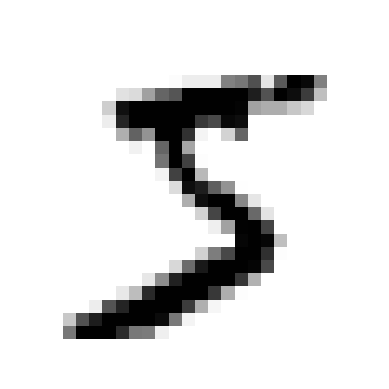

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit=X.iloc[0].values
some_digit_img=some_digit.reshape(28,28)

plt.imshow(some_digit_img ,cmap='binary')
plt.axis('off')
plt.show()

In [8]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


**We have to convert the string datatype to integer for the targets**

*- It is typically an unsigned 8 bit integer as the pixel value ranges from 0-255*

In [9]:
y=y.astype(np.uint8)

In [10]:
X_train , X_test , y_train ,y_test = X[:60000] , X[60000:] , y[:60000] ,y[60000:]

## Binary Classifier ##


**For now we will just go with binary classifier say it will only detect is the number is from a class 5 or not**

In [11]:
y_train_5=(y_train==5)
y_test_5=(y_test==5)

**We will use Stochastic Gradient Descent (SGD) because**

*Efficiency: Computes updates faster by using individual training examples.
Scalability: Handles large datasets effectively.
Faster Convergence: More frequent updates lead to quicker progress.
Noise Benefits: Noise helps escape local minima and improve generalization.
Online Learning: Suitable for real-time and incremental learning scenarios.
Simplicity: Easy to implement compared to other optimization algorithms.
Flexibility: Forms the basis for many advanced optimization techniques like mini-batch, momentum, RMSprop, and Adam.*

In [12]:
from sklearn.linear_model import SGDClassifier
sgd_c=SGDClassifier(random_state=42)
sgd_c.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [13]:

sgd_c.predict([some_digit])

c:\Users\Abdullah Bin Salman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

### - Measuring the accuracy of a classifier is a rigorous task and not as easy as regression models , it has many ways ###

## 1. Measuring using cross validation ##

**Cross validation score (inside of function)**

In [14]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds=StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
for train_index,test_index in skfolds.split(X_train,y_train_5):
    clone_clf=clone(sgd_c)
    x_train_fold=X_train.iloc[train_index]
    y_train_fold=y_train_5.iloc[train_index]
    x_test_fold=X_train.iloc[test_index]
    y_test_fold=y_train_5.iloc[test_index]

    clone_clf.fit(x_train_fold,y_train_fold)
    y_pred=clone_clf.predict(x_test_fold)
    correct=sum( y_pred == y_test_fold)
    print(correct/len(y_pred))

0.9669
0.91625
0.96785


In [15]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(sgd_c , X_train ,y_train_5 ,cv=3 ,scoring='accuracy')
score

array([0.95035, 0.96035, 0.9604 ])

*Accuracy appears more than 93% but it shouldn't make you more than happy because in next example we will make a function not in 5 class it will list everyone not in 5 class because we have total 5 fives in it so accuracy is shown but you aren't sure will it be accurate*

In [16]:
from sklearn.base import BaseEstimator
class never5Classifier(BaseEstimator):
    def fit(self ,X , y=None):
        return self
    def predict(self,X):
        return np.zeros((len(X),1) ,dtype=bool)


In [17]:
nvr5=never5Classifier()
cross_val_score(nvr5,X_train ,y_train_5 ,cv=3 , scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

*as only 10% entries are 5 so even if you classify every thing as not t your model still gets 90% accuracy but it's lame obviously*

**This is the reason accuracy is not preffered as performance matrix in classification tasks especially when data set is skewed**

## 2- Measurement using confusion matrix(better approach) ##

In [18]:
from sklearn.model_selection import cross_val_predict

y_train_pred=cross_val_predict(sgd_c,X_train,y_train_5,cv=3)

In [19]:
from sklearn.metrics import confusion_matrix
confusion_mat=confusion_matrix(y_train_5,y_train_pred)
confusion_mat

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

*This north-west part of confusion matrix tells the true negatives which the model predicted correct while the north-east are the false positives which model wrongly predicted as 5 when they were not*

*The south-west tells the falsly classified as non-5 when they were actually 5 and south east tells the correct predicted 5*

**We'll see the precision of the classifier by seeing the accuracy of positive predictions**

*Presision and recall are used for that purpose*

**Precision = T.P/(T.P +F.P)**

**Recall= T.P / (T.P + F.N)**

In [20]:
from sklearn.metrics import precision_score,recall_score
PS=precision_score(y_train_5,y_train_pred)
RS=recall_score(y_train_5,y_train_pred)
print( " Precision Score : " , PS ,"\n" , "Recall Score :" , RS)

 Precision Score :  0.8370879772350012 
 Recall Score : 0.6511713705958311


**We combine these 2 scores and It is called F1 score ( We take harmonic mean of both)**

*Regular mean treats all values equally while harmonic mean gives more wheitage to lower values So F1 score would be high only when both the scores are high*

In [21]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7325171197343846

**There is always a trade-off between precision and recall (inverse relation) . Scikit doesn't let you set the threshhold rather using decision_function() gives you score for every prediction and you can set any threshhold on that array**

In [22]:
y_score=sgd_c.decision_function([some_digit])
y_score

c:\Users\Abdullah Bin Salman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [23]:
threshhold1=0
threshhold2=8000
pred1=(y_score > threshhold1)
pred2=(y_score>threshhold2)
print(pred1 , pred2)

[ True] [False]


**To determine what threshhold to set use the cross_val_predict() to but specify you want decision scores instead of predictions**

In [24]:
y_decision_score=cross_val_predict(sgd_c,X_train,y_train_5 ,cv=3 ,method='decision_function')

In [25]:
from sklearn.metrics import precision_recall_curve
precision,recalls,threshholds=precision_recall_curve(y_train_5,y_decision_score)

In [26]:
def plot_precision_recall_vs_threshhold(precision,recalls,threshholds):
    plt.plot(threshholds , precision[:-1] , 'b--' ,label="Precision")
    plt.plot(threshholds , recalls[:-1] ,"g-" , label="Recall")
    [...]
    

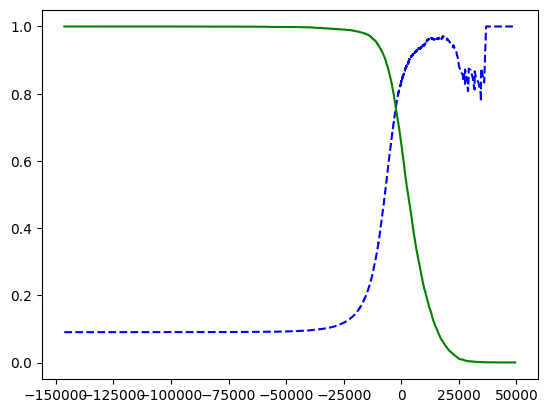

In [27]:
plot_precision_recall_vs_threshhold(precision,recalls,threshholds)
plt.show()

In [28]:
threshhold_90_percent=threshholds[np.argmax(precision>=0.9)]

In [29]:
y_train_pred_90=(y_decision_score>=threshhold_90_percent)

In [30]:
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [31]:
recall_score(y_train_5,y_train_pred_90)

0.4799852425751706

*High precision classifier is not useful with low recall*

## The ROC Curve (Used for binary classifiers) ##

*Instead of plotting the Precision vs recall curve this plots True positive rate (Recall) vs False positive rate*

In [32]:
from sklearn.metrics import roc_curve
fpr,tpr,threshholds1=roc_curve(y_train_5,y_decision_score)

In [33]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1] ,[0,1] ,'k--')
    [...]

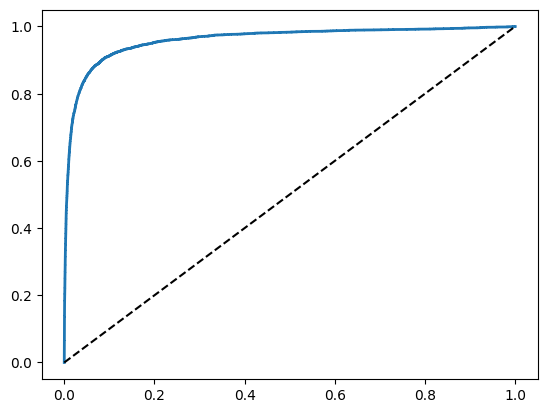

In [34]:
plot_roc_curve(fpr,tpr)
plt.show()

## Random forest classifier ##

**We will be using random forest classifier and compare it's ROC curve with ROC AUC of SGD Classifier**

*There is no decision_function() in random forest classifier but we have predict_proba() there*

In [35]:
from sklearn.ensemble import RandomForestClassifier
forest_clf=RandomForestClassifier(random_state=42)
y_probabs_forest=cross_val_predict(forest_clf,X_train,y_train_5,cv=3 ,method='predict_proba')


**The Roc curve expects a score and label rather we will give it positive class's probability**

In [36]:
y_scores_forest=y_probabs_forest[:,1]
fpr_forest,tpr_forest,threshholds_forest=roc_curve(y_train_5,y_scores_forest)

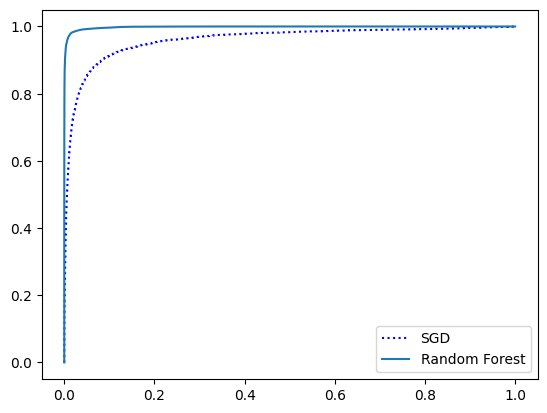

In [37]:
plt.plot(fpr,tpr,'b:' ,label="SGD")
plt.plot(fpr_forest,tpr_forest,label="Random Forest")
plt.legend(loc='lower right')
plt.show()

In [38]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores_forest)

0.9983436731328145

In [39]:
precision_forest,recalls_forst,threshholds_forest=precision_recall_curve(y_train_5,y_scores_forest)

In [40]:
threshhold_90_percent_forest=threshholds_forest[np.argmax(precision_forest>=0.9)]

In [41]:
threshhold_90_percent_predictions=(y_scores_forest>=threshhold_90_percent_forest)

In [42]:
recall_score(y_train_5,threshhold_90_percent_predictions)

0.9721453606345692

In [43]:
precision_score(y_train_5,threshhold_90_percent_predictions)

0.9020883259157823

## Multiclass Classification ##

**Multiple class classifier works on training multiple binary classifiers i.e. detecting a number from 1 to 6 . Either train a one vs All classifier or train multiple one vs one classifiers**

In [45]:
from sklearn.svm import SVC
svm_clff=SVC()
svm_clff.fit(X_train,y_train)
svm_clff.predict([some_digit])

c:\Users\Abdullah Bin Salman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [48]:
svm_scores=svm_clff.decision_function([some_digit])
svm_scores

c:\Users\Abdullah Bin Salman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [49]:
np.argmax([svm_scores])

5

*You can specify the type of classifier as OvR or OvO by creating an instance and passing the classifier to it's constructor *

In [50]:
from sklearn.multiclass import OneVsRestClassifier
OvR_clff=OneVsRestClassifier(SVC())
OvR_clff.fit(X_train,y_train)
OvR_clff.predict([some_digit])

c:\Users\Abdullah Bin Salman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\Abdullah Bin Salman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\Abdullah Bin Salman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\Abdullah Bin Salman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\Abdullah Bin Salman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid featu

array([5], dtype=uint8)

In [51]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_c,X_train_scaled,y_train,cv=3,scoring='accuracy')

array([0.8983, 0.891 , 0.9018])

## Error Analysis ##

In [52]:
y_train_pred=cross_val_predict(sgd_c,X_train_scaled,y_train,cv=3)
conf_mat=confusion_matrix(y_train, y_train_pred)
conf_mat

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

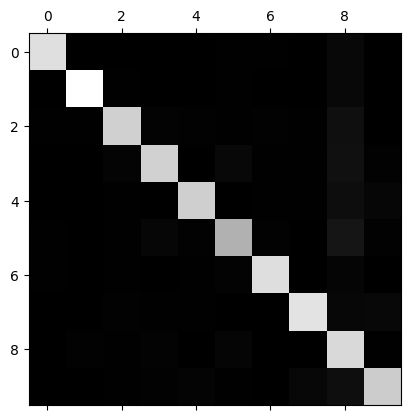

In [53]:
plt.matshow(conf_mat , cmap=plt.cm.gray)
plt.show()

## Multilabel Classification ##

**Sometime more than 1 thing ,object or person is to be predicted and labeled in a instance . We use multilabel Classification for the said purpose. For example in a image , if there are more than 1 person it flags or plants label on them**

In [54]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large=(y_train>=7)
y_train_odd=(y_train % 2 ==1)
y_multilabel=np.c_[y_train_large , y_train_odd]
knn_clff=KNeighborsClassifier()
knn_clff.fit(X_train,y_multilabel)

KNeighborsClassifier()

In [55]:
knn_clff.predict([some_digit])

c:\Users\Abdullah Bin Salman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False,  True]])

In [57]:
y_train_knn_predictions=cross_val_predict(knn_clff,X_train,y_multilabel,cv=3)
f1_score(y_multilabel,y_train_knn_predictions,average='macro')

0.976410265560605

*This gives each label equal wheightage whereas this is not the case everytime , say you have more pictures of one entity than other , you simply assign the wheightage to each entity*

In [59]:
f1_score(y_multilabel,y_train_knn_predictions,average='weighted')

0.9778357403921755

## Multioutput Classification ##

In [61]:
noise=np.random.randint(0,100,(len(X_train),784))
X_train_mod=X_train+noise
noise=np.random.randint(0,100,(len(X_test),784))
X_test_mod=X_test+noise
y_train_mod=X_train
y_test_mod=X_test